# 하루만에 환불한 사람은 물건을 직접 확인 안했으므로 환불한 사람으로 안 치기

In [1]:
# 패키지 불러오기
import pandas as pd # 데이터 처리
import numpy as np #연산
import matplotlib #시각화
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as s
import seaborn as sns
import math
import matplotlib.font_manager as fm
import warnings
import graphviz
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mse

from sklearn.model_selection import train_test_split # 데이터 분할 : train, test
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #예측/회귀
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.feature_selection import RFE
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from datetime import date
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, classification_report

path='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop=fm.FontProperties(fname=path, size=18).get_name()
matplotlib.rc('font',family = fontprop)
matplotlib.rc('axes', unicode_minus = False)

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 400

from sklearn.neighbors import KNeighborsClassifier

In [2]:
df1 = pd.read_csv("01_sales_data2.csv")
df2 = pd.read_csv("02_customer_data.csv")
df3 = pd.read_csv("03_stock_data.csv")

df = pd.merge(df1,df2,on = ["customer_id"])
df = pd.merge(df, df3, on=["product_name"])

In [3]:
df.sort_values(by = "sales")
# 매출별로 정렬함

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type
282475,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2021-12-09,2.08,E16446,-168469.60,New York,NY,8177,778,big,metro,east,consignment
83414,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2021-01-18,1.04,E12346,-77183.60,Houston,TX,2325,1658,middle,other,south,consignment
68268,C556445,M,Manual,-1,2021-06-10,38970.00,E15098,-38970.00,Los Angeles,CA,3985,1216,middle,metro,west,consignment
85044,C551685,POST,POSTAGE,-1,2021-05-03,8142.75,E16029,-8142.75,New York,NY,8177,778,big,metro,east,consignment
68044,C551699,M,Manual,-1,2021-05-03,6930.00,E16029,-6930.00,New York,NY,8177,778,big,metro,east,consignment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165008,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2021-09-20,5.06,E17450,7144.72,San Diego,CA,1429,844,middle,sightseeing,west,buying
85045,551697,POST,POSTAGE,1,2021-05-03,8142.75,E16029,8142.75,New York,NY,8177,778,big,metro,east,consignment
282504,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2021-06-10,649.50,E15098,38970.00,Los Angeles,CA,3985,1216,middle,metro,west,consignment
83413,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2021-01-18,1.04,E12346,77183.60,Houston,TX,2325,1658,middle,other,south,consignment


In [4]:
df.query("customer_id == 'E15373'").sort_values(by = "date")
# 처음 주문 했는데 -값이 나옴 ,,, 의심스러움 !

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type
91766,C540097,22179,SET 10 LIGHTS NIGHT OWL,-4,2021-01-04,6.75,E15373,-27.00,New York,NY,8177,778,big,metro,east,consignment
52417,C540097,22113,GREY HEART HOT WATER BOTTLE,-4,2021-01-04,3.75,E15373,-15.00,New York,NY,8177,778,big,metro,east,consignment
72855,C540097,21843,RED RETROSPOT CAKE STAND,-6,2021-01-04,10.95,E15373,-65.70,New York,NY,8177,778,big,metro,east,buying
222798,C540097,22835,HOT WATER BOTTLE I AM SO POORLY,-4,2021-01-04,4.65,E15373,-18.60,New York,NY,8177,778,big,metro,east,consignment
62986,C540097,22423,REGENCY CAKESTAND 3 TIER,-6,2021-01-04,12.75,E15373,-76.50,New York,NY,8177,778,big,metro,east,consignment
74197,542220,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",24,2021-01-26,4.25,E15373,102.00,New York,NY,8177,778,big,metro,east,consignment
72856,542220,21843,RED RETROSPOT CAKE STAND,3,2021-01-26,10.95,E15373,32.85,New York,NY,8177,778,big,metro,east,buying
62987,542220,22423,REGENCY CAKESTAND 3 TIER,6,2021-01-26,12.75,E15373,76.50,New York,NY,8177,778,big,metro,east,consignment
21702,544749,48185,DOORMAT FAIRY CAKE,2,2021-02-23,7.95,E15373,15.90,New York,NY,8177,778,big,metro,east,consignment
97715,544749,20685,DOORMAT RED RETROSPOT,1,2021-02-23,7.95,E15373,7.95,New York,NY,8177,778,big,metro,east,consignment


In [5]:
df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0
entry_to_remove = []
doubtfull_entry = []
for index, col in  df.iterrows(): #interrows 객채로 변환
    # 주문 수량이 0보다 크거나 할인의 경우
    if (col['quantity'] > 0):
        continue
            # 수량이 +이면 그냥 대입
        # 수량이 -이면 아래것을 돌림
    df_test = df[(df['customer_id'] == col['customer_id']) &
                         (df['product_code']  == col['product_code']) &
                         (df['date'] < col['date']) &
                         (df['quantity']   > 0)].copy()
    # 주문일이 더 빠르고 수량이 0보다 큰 경우가 1개도 없는 경우
    if (df_test.shape[0] == 0):
        doubtfull_entry.append(index)
    # 주문일이 더 빠르고 수량이 0보다 큰 경우가 1개 있는 경우 (수량만큼 마이너스 값이 들어감)
    elif (df_test.shape[0] == 1):
        index_order = df_test.index[0]
        # 취소된 수량에 대한 컬럼을 새로 생성한다.
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['quantity']
        entry_to_remove.append(index)
    # 주문일이 더 빠르고 수량이 0보다 큰 경우가 2개 이상인 경우
    elif (df_test.shape[0] > 1):
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)
        # 부분취소를 한 경우
        for ind, val in df_test.iterrows():
            if val['quantity'] < -col['quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['quantity']
            entry_to_remove.append(index)
            break 
            
# entry_to_remove : 없애줘야할것 = 마이너스 값인데, 주문일이 더 빠르고 수량이 +인 것이 이전에 있는 인덱스가 경우
# doubtfull_entry : 의심되는것 ex) 마이너스 값인데 전에 구매한 것이 없는거
# 둘다 인덱스만 넣어줬다는 거 주의!!!!
# 원래 df_cleaned -> df1

In [6]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
# 삭제 데이터 = 취소했는데 전에 산 수량보다 큰 수량으로 취소한 데이터
print("doubtfull_entry: {}".format(len(doubtfull_entry)))
# 이상한 데이터 = 취소했는데 시킨게 없는거

entry_to_remove: 4368
doubtfull_entry: 1442


In [7]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
# 둘다 지움 !
# 이제 df1에는 환불한것들이랑 의심되는 것들 없음, df1 = 진짜 주문 수량
# 중요한건 이 데이터 프레임은 환불횟수만 쓸 수 있음

In [8]:
df_cleaned['date'] = pd.to_datetime(df['date'])
df_cleaned['quarter'] = df_cleaned['date'].apply(lambda x : x.quarter)
# 분기 혹은 날짜별로 분석하기 위해 datetime 함수를 써줌

In [9]:
df_refund = df_cleaned.query("QuantityCanceled > 0")
df_refund
# 진짜 환불 횟수를 저장해둠

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,quarter
49,540275,22386,JUMBO BAG PINK POLKADOT,20,2021-01-04,1.95,E13680,39.00,Houston,TX,2325,1658,middle,other,south,consignment,20,1
74,557628,22386,JUMBO BAG PINK POLKADOT,100,2021-01-04,1.79,E15311,179.00,Houston,TX,2325,1658,middle,other,south,consignment,1,1
80,568505,22386,JUMBO BAG PINK POLKADOT,100,2021-01-04,1.79,E15311,179.00,Houston,TX,2325,1658,middle,other,south,consignment,1,1
108,563532,22386,JUMBO BAG PINK POLKADOT,100,2021-01-04,1.79,E17511,179.00,Los Angeles,CA,3985,1216,middle,metro,west,consignment,100,1
172,558643,22386,JUMBO BAG PINK POLKADOT,20,2021-01-04,2.08,E13534,41.60,Philadelphia,PA,1585,348,middle,other,east,consignment,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282338,569252,23071,MARIE ANTOINETTE TRINKET BOX GOLD,4,2021-12-29,12.50,E14333,50.00,San Jose,CA,1003,461,middle,sightseeing,west,consignment,3,4
282344,546096,22764,"RUSTIC WOODEN CABINET, GLASS DOORS",1,2021-12-17,24.95,E15502,24.95,Los Angeles,CA,3985,1216,middle,metro,west,consignment,1,4
282478,554123,84616,SILVER ROCCOCO CHANDELIER,2,2021-11-12,29.95,E16818,59.90,San Antonio,TX,1598,1291,middle,other,south,consignment,1,4
282485,554348,23253,16 PC CUTLERY SET PANTRY DESIGN,4,2021-10-12,15.95,E13523,63.80,Chicago,IL,2671,589,middle,metro,east,consignment,1,4


In [10]:
df_refund[['customer_id','quantity','QuantityCanceled']]

,customer_id,quantity,QuantityCanceled
49,E13680,20,20
74,E15311,100,1
80,E15311,100,1
108,E17511,100,100
172,E13534,20,4
...,...,...,...
282338,E14333,4,3
282344,E15502,1,1
282478,E16818,2,1
282485,E13523,4,1


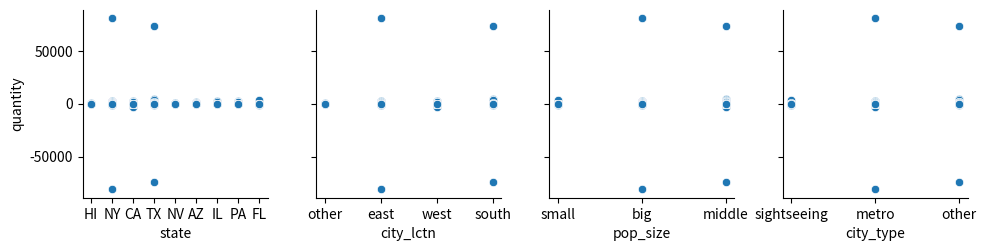

In [11]:
sns.pairplot(df,y_vars="quantity",x_vars=["state", "city_lctn", "pop_size", "city_type"]);
# 원래의 데이터와 정제된 데이터를 산점도 분석하면 이렇다.

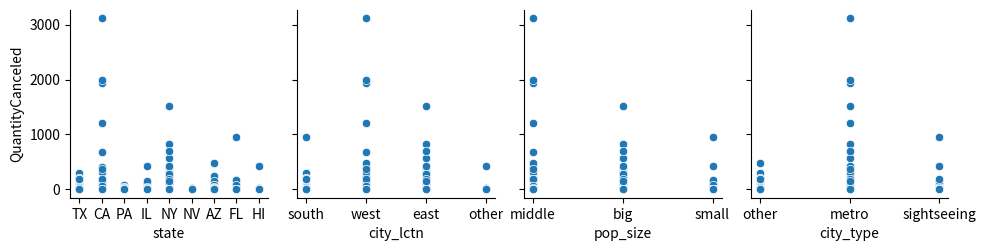

In [27]:
sns.pairplot(df_refund,y_vars="QuantityCanceled",x_vars=["state", "city_lctn", "pop_size", "city_type"]);
# 정확한 환불 개수는 이렇다.

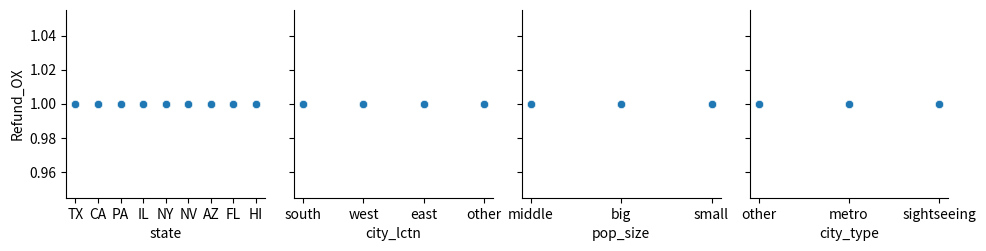

In [45]:
sns.pairplot(df_refund,y_vars="Refund_OX",x_vars=["state", "city_lctn", "pop_size", "city_type"]);

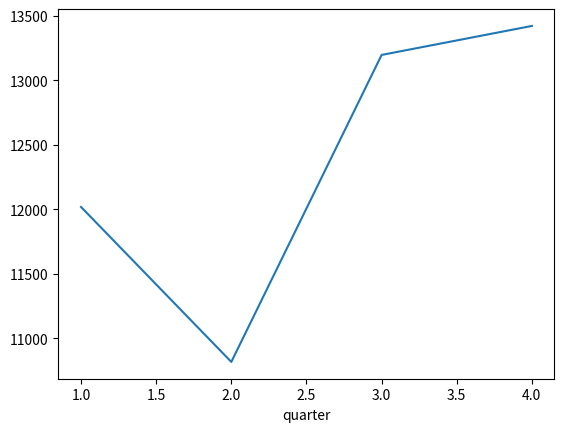

In [13]:
# 환불 물건의 수량은 3분기 4분기때 많았다.
quarter = df_refund.groupby(["quarter"])["QuantityCanceled"].sum()
quarter.plot();

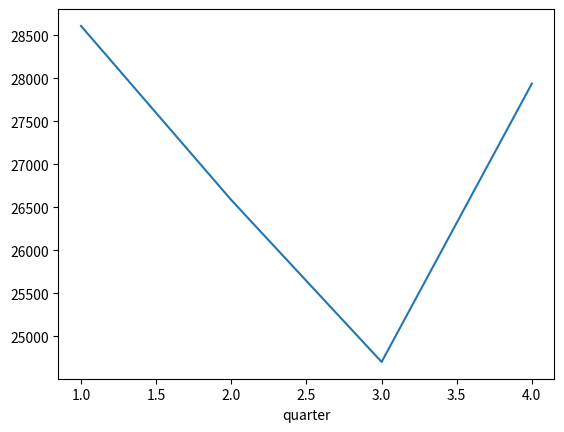

In [29]:
df_refund["sales_refund"] = df_refund["QuantityCanceled"] * df_refund["unit_price"]
#환불 금액을 알아보기 위해 컬럼을 새로 만들어 준다.
quarter = df_refund.groupby(["quarter"])["sales_refund"].sum()
quarter.plot();
#환불금액을 보니 3분기때가 가장 작고 1,4분기때 가장 컸다.

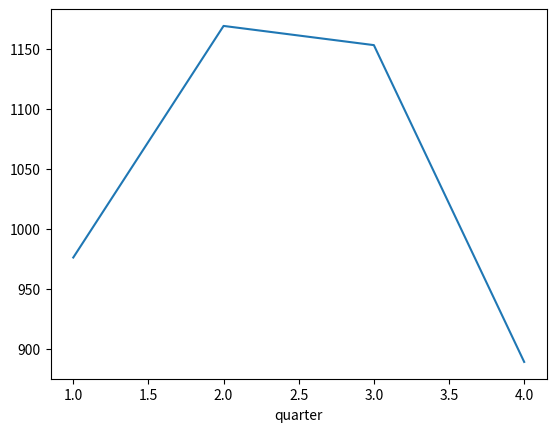

In [15]:
# 환불 횟수는 2분기, 3분기때 많았다.
A = []
for i in df_refund['QuantityCanceled']:
    if i > 0 :
        A.append(1)
    else :
        A.append(0)
df_refund['Refund_OX'] = A
quarter = df_refund.groupby(["quarter"])["Refund_OX"].sum()
quarter.plot();

In [18]:
a = df_refund.groupby(["quarter"])["QuantityCanceled"].sum()
a

quarter
1    12018
2    10816
3    13197
4    13422
Name: QuantityCanceled, dtype: int64

In [21]:
df['date'] = pd.to_datetime(df['date'])
df['quarter'] = df['date'].apply(lambda x : x.quarter)
df_refund
# 분기 혹은 날짜별로 분석하기 위해 datetime 함수를 써줌
b = df.groupby(["quarter"])["quantity"].sum()
b

quarter
1     680693
2     816439
3    1043691
4     766535
Name: quantity, dtype: int64

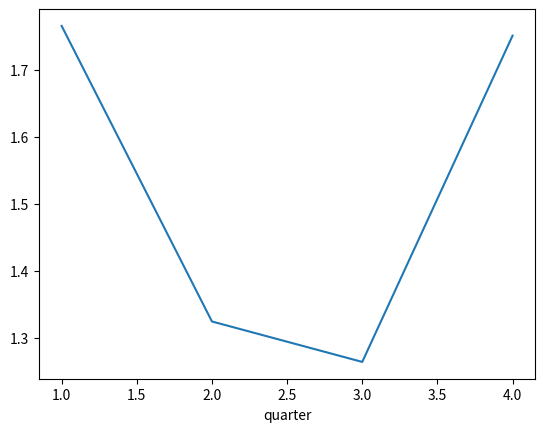

In [30]:
c = a/b
d = c * 100
d.plot();

In [31]:
df_refund['month'] = df_refund['date'].apply(lambda x : x.month)

In [37]:
df_refund

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,quarter,Refund_OX,sales_refund,month
49,540275,22386,JUMBO BAG PINK POLKADOT,20,2021-01-04,1.95,E13680,39.00,Houston,TX,2325,1658,middle,other,south,consignment,20,1,1,39.00,1
74,557628,22386,JUMBO BAG PINK POLKADOT,100,2021-01-04,1.79,E15311,179.00,Houston,TX,2325,1658,middle,other,south,consignment,1,1,1,1.79,1
80,568505,22386,JUMBO BAG PINK POLKADOT,100,2021-01-04,1.79,E15311,179.00,Houston,TX,2325,1658,middle,other,south,consignment,1,1,1,1.79,1
108,563532,22386,JUMBO BAG PINK POLKADOT,100,2021-01-04,1.79,E17511,179.00,Los Angeles,CA,3985,1216,middle,metro,west,consignment,100,1,1,179.00,1
172,558643,22386,JUMBO BAG PINK POLKADOT,20,2021-01-04,2.08,E13534,41.60,Philadelphia,PA,1585,348,middle,other,east,consignment,4,1,1,8.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282338,569252,23071,MARIE ANTOINETTE TRINKET BOX GOLD,4,2021-12-29,12.50,E14333,50.00,San Jose,CA,1003,461,middle,sightseeing,west,consignment,3,4,1,37.50,12
282344,546096,22764,"RUSTIC WOODEN CABINET, GLASS DOORS",1,2021-12-17,24.95,E15502,24.95,Los Angeles,CA,3985,1216,middle,metro,west,consignment,1,4,1,24.95,12
282478,554123,84616,SILVER ROCCOCO CHANDELIER,2,2021-11-12,29.95,E16818,59.90,San Antonio,TX,1598,1291,middle,other,south,consignment,1,4,1,29.95,11
282485,554348,23253,16 PC CUTLERY SET PANTRY DESIGN,4,2021-10-12,15.95,E13523,63.80,Chicago,IL,2671,589,middle,metro,east,consignment,1,4,1,15.95,10


In [39]:
df_refund.query("month == 12").sort_values(by = 'QuantityCanceled')

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,quarter,Refund_OX,sales_refund,month
242847,559897,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,24,2021-12-01,2.75,E16779,66.00,Los Angeles,CA,3985,1216,middle,metro,west,consignment,1,4,1,2.75,12
250503,562371,22192,BLUE DINER WALL CLOCK,2,2021-12-05,8.50,E13709,17.00,Chicago,IL,2671,589,middle,metro,east,buying,1,4,1,8.50,12
250691,549646,21318,GLASS CHALICE BLUE SMALL,36,2021-12-05,0.39,E12982,14.04,Los Angeles,CA,3985,1216,middle,metro,west,consignment,1,4,1,0.39,12
250718,550504,22305,COFFEE MUG PINK PAISLEY DESIGN,6,2021-12-05,2.55,E16654,15.30,Los Angeles,CA,3985,1216,middle,metro,west,consignment,1,4,1,2.55,12
251502,541566,22471,TV DINNER TRAY AIR HOSTESS,8,2021-12-05,1.95,E17722,15.60,Los Angeles,CA,3985,1216,middle,metro,west,consignment,1,4,1,1.95,12
251826,544278,22526,WHEELBARROW FOR CHILDREN,1,2021-12-06,12.75,E15382,12.75,Chicago,IL,2671,589,middle,metro,east,consignment,1,4,1,12.75,12
253573,561195,84927A,WAKE UP COCKEREL TILE HOOK,6,2021-12-06,0.39,E14796,2.34,Chicago,IL,2671,589,middle,metro,east,buying,1,4,1,0.39,12
253724,563742,22634,CHILDS BREAKFAST SET SPACEBOY,32,2021-12-06,8.50,E17929,272.00,Los Angeles,CA,3985,1216,middle,metro,west,consignment,1,4,1,8.50,12
253736,544568,22634,CHILDS BREAKFAST SET SPACEBOY,2,2021-12-06,9.95,E15065,19.90,Chicago,IL,2671,589,middle,metro,east,consignment,1,4,1,9.95,12
253738,544934,22634,CHILDS BREAKFAST SET SPACEBOY,2,2021-12-06,9.95,E13345,19.90,Chicago,IL,2671,589,middle,metro,east,consignment,1,4,1,9.95,12


In [40]:
df.query("stock_type == 'consignment'").count()

invoice          258152
product_code     258152
product_name     258152
quantity         258152
date             258152
unit_price       258152
customer_id      258152
sales            258152
city             258152
state            258152
pop_thousand     258152
land_sq_meter    258152
pop_size         258152
city_type        258152
city_lctn        258152
stock_type       258152
quarter          258152
dtype: int64

In [42]:
df.query("stock_type == 'buying'").count()

invoice          24490
product_code     24490
product_name     24490
quantity         24490
date             24490
unit_price       24490
customer_id      24490
sales            24490
city             24490
state            24490
pop_thousand     24490
land_sq_meter    24490
pop_size         24490
city_type        24490
city_lctn        24490
stock_type       24490
quarter          24490
dtype: int64